In [431]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [432]:
conf = !python  parameters.py

In [433]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [434]:
## ESPECIFIC CONFIGS
configs.name="E100"
configs.n_devices=99
configs.n_jobs=3

In [435]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)

In [436]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost"]
df

,model,sample,time,cost,reward,iTime,iCost
0,1000,0,26.0,290.0,-26.0,123.0,180.0
1,1000,1,27.0,225.0,-27.0,88.0,180.0
2,1000,2,25.0,265.0,-25.0,88.0,180.0
3,1000,3,26.0,225.0,-26.0,88.0,180.0
4,1000,4,28.0,216.0,-28.0,123.0,180.0
...,...,...,...,...,...,...,...
145,0100,25,224.0,9.0,-9.0,123.0,180.0
146,0100,26,213.0,9.0,-9.0,88.0,180.0
147,0100,27,120.0,9.0,-9.0,88.0,180.0
148,0100,28,144.0,9.0,-9.0,88.0,180.0


# DRL - average all samples (NOT VALID)

In [437]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean})
dfmodel

,time,cost
model,,
0100,168.033340,9.133333
1000,26.700001,248.399994
2575,30.066668,12.066667
5050,26.833334,13.133333
7525,25.066668,19.966667


In [438]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [439]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

0100
168.03334
1000
26.7
2575
30.066668
5050
26.833334
7525
25.066668


In [440]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)
    

0100
1000
2575
5050
7525


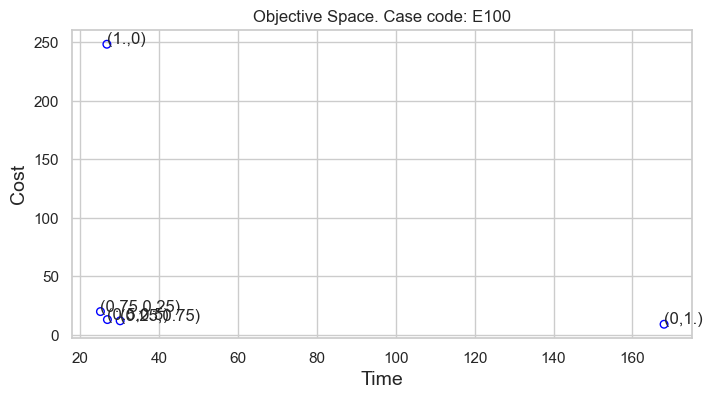

In [441]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [412]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(5, 2)

In [401]:
avg_pf

array([[3361.24,  349.26],
       [ 395.1 , 1620.  ],
       [3574.98,  194.56],
       [1587.44, 1737.84],
       [ 567.04, 2556.36]], dtype=float32)

In [402]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 0.0


# DRL one sample

In [442]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,1000,0,26.0,290.0,-26.0,123.0,180.0
1,1000,1,27.0,225.0,-27.0,88.0,180.0
2,1000,2,25.0,265.0,-25.0,88.0,180.0
3,1000,3,26.0,225.0,-26.0,88.0,180.0
4,1000,4,28.0,216.0,-28.0,123.0,180.0


In [443]:
dfDRL = df[df.case==0]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,1000,0,26.0,290.0,-26.00,123.0,180.0
30,7525,0,27.0,9.0,-22.50,123.0,180.0
60,5050,0,24.0,9.0,-16.50,123.0,180.0
90,2575,0,34.0,9.0,-15.25,123.0,180.0
120,0100,0,176.0,13.0,-13.00,123.0,180.0


In [444]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values)).T
avg_pf

array([[ 26., 290.],
       [ 27.,   9.],
       [ 24.,   9.],
       [ 34.,   9.],
       [176.,  13.]], dtype=float32)

In [445]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)

(26.0, 290.0)
1000
(27.0, 9.0)
7525
(24.0, 9.0)
5050
(34.0, 9.0)
2575
(176.0, 13.0)
0100


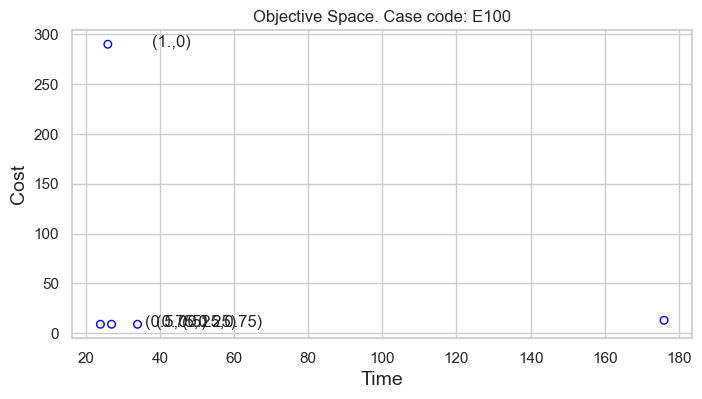

In [446]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')


for i in range(len(avg_pf)):
    print((avg_pf[i,0], avg_pf[i,1]))
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0]+12, avg_pf[i,1]-2.5))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA

In [462]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')

df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
# df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)



In [463]:
df.columns = ["case","time","cost","executionTime"]
df.head()

,case,time,cost,executionTime
0,0,21.0,9.0,0 days 00:00:17


In [464]:
dfga = df[df.case==0]
dfga

,case,time,cost,executionTime
0,0,21.0,9.0,0 days 00:00:17


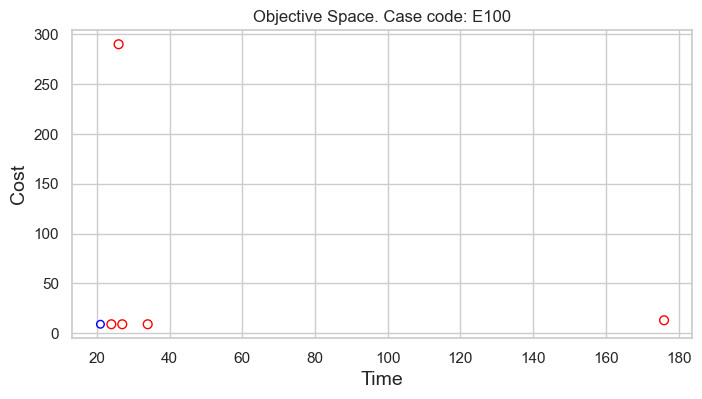

In [465]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue')
ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA + DRL

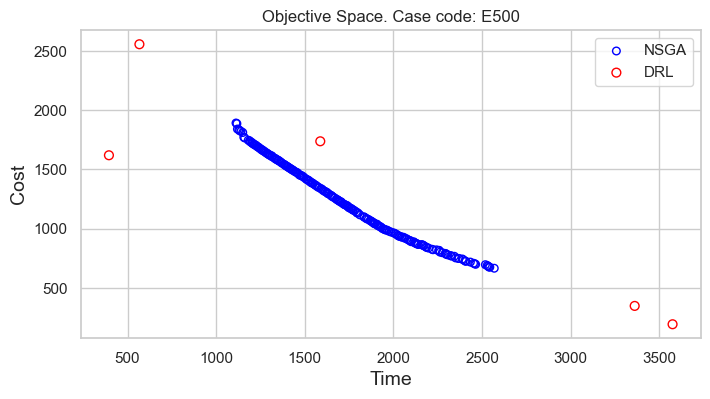

In [419]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [285]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [286]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  0.0


In [287]:
print("H - DRL ", ind(avg_pf)) 

H - DRL  48675.0


### Violin plot del PF según pesos del modelo DRL

In [420]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,1000,372.0,1620.0,0
50,7525,596.0,2500.0,0
100,5050,1561.0,1720.0,0
150,2575,3573.0,198.0,0
200,0100,3338.0,367.0,0


In [421]:
x = list(range(len(dtvio)))

In [422]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(.1,.0)', '(.7,.5)', '(.5,.0)', '(.2,.5)', '(.0,.1)'], dtype='<U7')

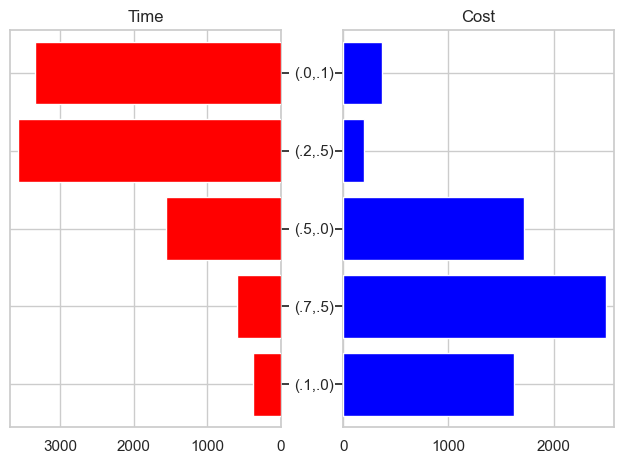

In [423]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [292]:
dtvio.model

0      1000
50     7525
100    5050
150    2575
200    0100
Name: model, dtype: object

In [293]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['0100', '1000', '2575', '5050', '7525'], dtype='object', name='model')


In [294]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (11,) and arg 3 with shape (5,).

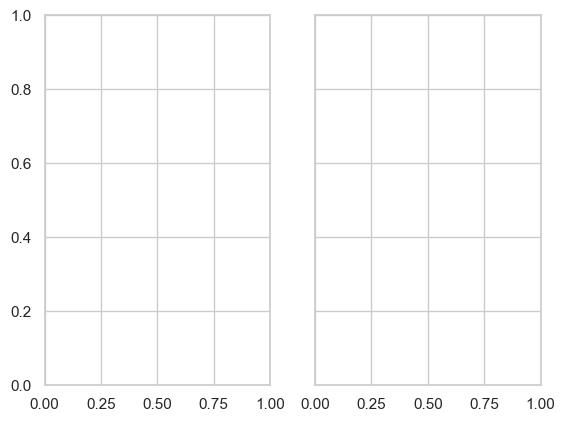

In [295]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

# MONO GA

In [426]:
df = pd.read_pickle('logs/log_ga_pf_mono_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w5050.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["case","time","cost","constraing","exec"]
df

,case,time,cost,constraing,exec
0,0,432.0,2610.0,0,0 days 00:06:02
1,0,432.0,2610.0,0,0 days 00:06:02
2,0,432.0,2610.0,0,0 days 00:06:02
3,0,432.0,2610.0,0,0 days 00:06:02
4,0,432.0,2610.0,0,0 days 00:06:02
5,0,432.0,2610.0,0,0 days 00:06:02
6,0,432.0,2610.0,0,0 days 00:06:02


In [425]:
dfDRL = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
dfDRL = pd.DataFrame(dfDRL)
dfDRL.columns = ["model","case","time","cost","reward","iTime","iCost"]
dt = dfDRL[dfDRL.model=="5050"]
dt["reward2"] = dt.time*0.5+(dt.cost*(0.5/3))
dt

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_52707/3133565852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["reward2"] = dt.time*0.5+(dt.cost*(0.5/3))


,model,case,time,cost,reward,iTime,iCost,reward2
100,5050,0,1561.0,1720.0,-1640.5,372.0,1620.0,1067.166748
101,5050,1,1651.0,1740.0,-1695.5,267.0,1620.0,1115.500000
102,5050,2,1578.0,1823.0,-1700.5,407.0,1620.0,1092.833374
103,5050,3,1642.0,1682.0,-1662.0,477.0,1620.0,1101.333374
104,5050,4,1582.0,1698.0,-1640.0,442.0,1620.0,1074.000000
105,5050,5,1648.0,1812.0,-1730.0,407.0,1620.0,1126.000000
106,5050,6,1606.0,1711.0,-1658.5,372.0,1620.0,1088.166748
107,5050,7,1440.0,1733.0,-1586.5,407.0,1620.0,1008.833374
108,5050,8,1361.0,1817.0,-1589.0,442.0,1620.0,983.333374
109,5050,9,1489.0,1788.0,-1638.5,442.0,1620.0,1042.500000
